# SURUTHI S
# 225229141
# Pizza Liking Prediction using KNN

# Step 2 : Importing Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("pizza.csv")
df

,age,weight,likepizza
0,50,65,0
1,20,55,1
2,15,40,1
3,70,65,0
4,30,70,1
5,75,60,0


In [4]:
df.head()

,age,weight,likepizza
0,50,65,0
1,20,55,1
2,15,40,1
3,70,65,0
4,30,70,1


In [7]:
df.columns

Index(['age', 'weight', 'likepizza'], dtype='object')

In [8]:
df.info

<bound method DataFrame.info of    age  weight  likepizza
0   50      65          0
1   20      55          1
2   15      40          1
3   70      65          0
4   30      70          1
5   75      60          0>

In [9]:
df.shape

(6, 3)

# Step 3 : Vizualize Relationship

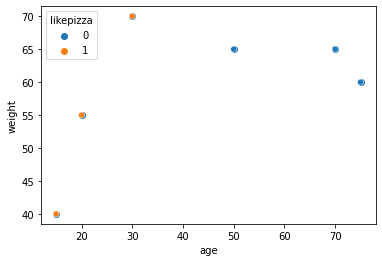

In [10]:
plt.xlabel("age")
plt.ylabel("weight")
plt.scatter(df.age, df.weight)


plot = sns.scatterplot(x=df.age,y=df.weight,hue=df.likepizza)


# Step 4 : Prepare X Matrix and Y vector

In [15]:
x_df = df[['age','weight']]

y_df = df[['likepizza']]

print(x_df)
print(y_df)

   age  weight
0   50      65
1   20      55
2   15      40
3   70      65
4   30      70
5   75      60 

   likepizza
0          0
1          1
2          1
3          0
4          1
5          0


# Step 5: Examine X and Y

In [21]:
print(x_df)
print("Type of X Matrix",type(x_df))
print(y_df)
print("Type of Y Vector ",type(y_df))

   age  weight
0   50      65
1   20      55
2   15      40
3   70      65
4   30      70
5   75      60 

Type of X Matrix <class 'pandas.core.frame.DataFrame'> 

   likepizza
0          0
1          1
2          1
3          0
4          1
5          0 

Type of Y Vector  <class 'pandas.core.frame.DataFrame'> 



# Step 6 : Model Building

In [24]:
# creating Instance for the model

knn = KNeighborsClassifier(n_neighbors=2)    

# Training / Fitting Data

knn.fit(x_df,y_df)


KNeighborsClassifier(n_neighbors=2)

# Step 7 : Model Testing

Will a Person who is 25 years old with weight 50kgs Like Pizza or not ?
The answer should be 1 (ie Yes)

In [25]:
print(knn.predict([[25,50]]))

[1]


Will a Person who is 60 years old with weight 60 kgs Like Pizza or not ?
The answer should be 0 (ie No)

In [26]:
print(knn.predict([[60,60]]))

[0]


In [27]:
print(knn.score(x_df,y_df))

1.0


# Step 8 : Change n_neighbors = 3

In [28]:
# creating Instance for the model

knn = KNeighborsClassifier(n_neighbors=3)    

# Training / Fitting Data

knn.fit(x_df,y_df)

# predicting the outcomes 

# when age = 25 and weight = 50
print(knn.predict([[25,50]]))


# when age = 60 and weight = 60
print(knn.predict([[60,60]]))

[1]
[0]


The results when n_neighbors = 2 is same as n_neighbors = 3

# Step 9 : Predict on entire dataset

In [29]:
y_pred = knn.predict(x_df)
y_pred

array([0, 1, 1, 0, 1, 0], dtype=int64)

# Step 10 :  Accuracy Function

In [30]:
def accuracy(actual,pred):
    return sum(actual == pred)/float(actual.shape[0])

# Step 11 :  Find Accuracy 

In [32]:
y_np = y_df.to_numpy()
y_pred = y_pred.reshape(6,1)

accuracy(y_np, y_pred)

array([1.])

# Step 12 :  Prediction on Test Set

In [33]:
test = pd.read_csv("pizza_test.csv")

In [34]:
test.head()

,age,weight,likepizza
0,48,68,1
1,35,45,1
2,15,40,0
3,55,65,0


In [35]:
test.info

<bound method DataFrame.info of    age  weight  likepizza
0   48      68          1
1   35      45          1
2   15      40          0
3   55      65          0>

In [36]:
test.shape

(4, 3)

In [37]:
test.columns

Index(['age', 'weight', 'likepizza'], dtype='object')

In [38]:
x_test = test.drop("likepizza",axis='columns')
y_test = test[['likepizza']]

In [41]:
print(x_test,y_test)

   age  weight
0   48      68
1   35      45
2   15      40
3   55      65 

    likepizza
0          1
1          1
2          0
3          0


In [43]:
knn = KNeighborsClassifier(n_neighbors=2)    

In [55]:
knn.fit(x_test,y_test)

KNeighborsClassifier(n_neighbors=3)

In [66]:
y_pred_test = knn.predict(x_test)

y_test_np = y_test.to_numpy()

y_pred_test = y_pred_test.reshape(4,1)


accuracy(y_test_np, y_pred_test)



array([0.5])

# Step 13 : Find the best value for k

In [51]:
scores=[]
for i in range(1,4):
    knn = KNeighborsClassifier(n_neighbors=i)   
    knn.fit(x_df,y_df)
    y_pred_test = knn.predict(x_test)
    y_test_np = y_test.to_numpy()  
    y_pred_test = y_pred_test.reshape(4,1)
    acc = accuracy(y_test_np, y_pred_test)
    scores.append((i,float(acc)))
    

In [52]:
scores

[(1, 0.5), (2, 0.5), (3, 0.5)]

# Step 14 :  accuracy_score function

In [54]:
# training dataset

score1 = accuracy_score(y_np, y_pred)  
print(score1)  

1.0


In [53]:
# testing dataset

score = accuracy_score(y_test_np, y_pred_test)  
print(score)  

0.5
